In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X1 = np.random.rand(100, 1)
# The values in the array are drawn randomly from a uniform distribution over the interval [0,1)



# Set random seed for reproducibility
np.random.seed(42)

# Create 2 features (X1, X2)
X1 = np.random.rand(100, 1) * 10  # Feature 1: Random values between 0 and 10
X2 = np.random.rand(100, 1) * 20  # Feature 2: Random values between 0 and 20

In [5]:


# Create a target variable y that is a linear combination of X1 and X2
# y = 2 * X1 + 3 * X2 + some noise
noise = np.random.randn(100, 1) * 2  # Gaussian noise
y = 2 * X1 + 3 * X2 + noise

# Combine X1 and X2 into a single feature matrix X
X = np.hstack([X1, X2])


In [6]:
# Convert to a Pandas DataFrame for better readability
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y


In [7]:
# Display the first few rows of the dataset
print(df.head())

   Feature 1  Feature 2     Target
0   3.745401   0.628584   8.016504
1   9.507143  12.728208  57.663418
2   7.319939   6.287120  34.087383
3   5.986585  10.171414  41.058708
4   1.560186  18.151329  61.305910


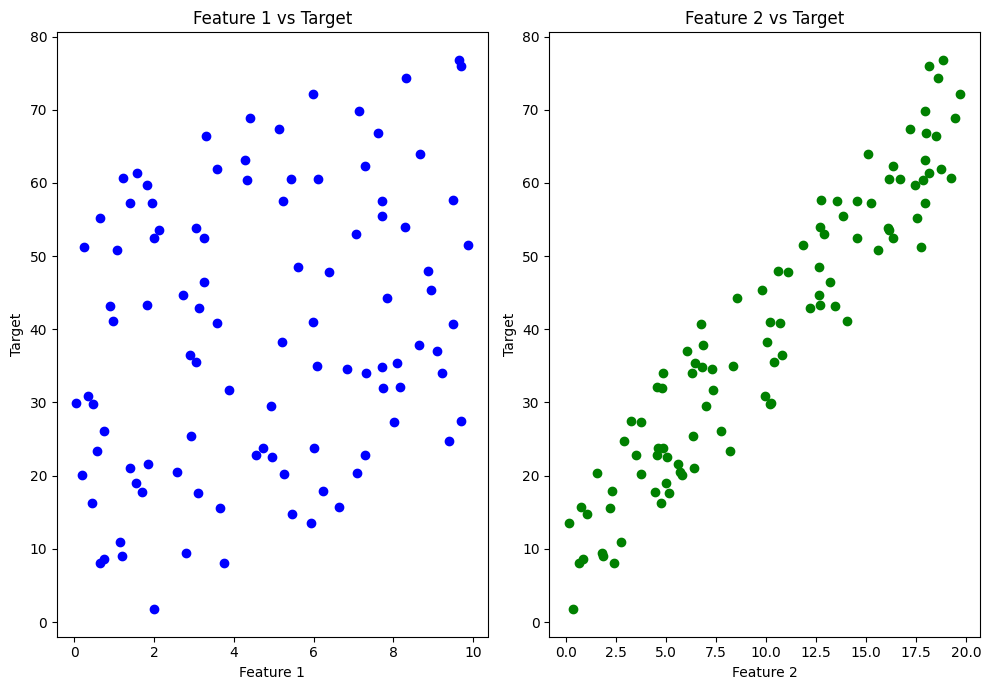

In [8]:
# Plot the features and the target to visualize the relationship
fig = plt.figure(figsize=(10, 7))

# Plot Feature 1 vs Target
ax1 = fig.add_subplot(121)
ax1.scatter(X1, y, color='blue', label='Feature 1 vs Target')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Target')
ax1.set_title('Feature 1 vs Target')

# Plot Feature 2 vs Target
ax2 = fig.add_subplot(122)
ax2.scatter(X2, y, color='green', label='Feature 2 vs Target')
ax2.set_xlabel('Feature 2')
ax2.set_ylabel('Target')
ax2.set_title('Feature 2 vs Target')

plt.tight_layout()
plt.show()


- Feature 1 (X1) has a smaller weight (2) in the equation for 𝑦 compared to Feature 2 (X2) (which has a larger weight of 3). This means that, for the same change in 𝑋1,the resulting change in y is smaller.Noise is added to both the relationships, but the influence of X1 on y is weaker compared to X2.As a result, when you plot Feature 1 vs Target, you see a more spread out or less tightly correlated relationship, because X1 is not as strongly related to y as X2.

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
X=df[['Feature 1','Feature 2']]
y=df['Target']

In [12]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Predict on the test data
y_pred = model.predict(X_test)


In [15]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²) value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 2.6657283954607687
R-squared: 0.9933125746608438


In [16]:
# Coefficients for X1 and X2
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Coefficients: [1.95000442 3.07871737]
Intercept: -0.4134850220529884


- The R-squared (R²) score indicates how well the model explains the variance in the target variable (y). Specifically, it tells you the proportion of the variance in the target variable that is predictable from the independent variables (X1, X2).

- An R² value of 0.993 means that 99.3% of the variance in the target variable is explained by the model. This is a very high R², suggesting that your model fits the data very well and that the predictors (X1 and X2) explain almost all of the variability in y.

# Evaluating the Effectiveness of a Linear Regression Model

When evaluating the performance of a linear regression model, several key metrics and calculations are commonly used. These metrics provide insight into how well the model fits the data and how well it generalizes to new data. Below is an overview of the most important terms and metrics for linear regression evaluation.

## 1. **R-squared (R²)**
   - **Definition**: R-squared represents the proportion of variance in the target variable that is explained by the model.
   - **Formula**:
     $$
     R^2 = 1 - \frac{\sum_{i} (y_i - \hat{y}_i)^2}{\sum_{i} (y_i - \bar{y})^2}
     $$
     Where:
     - \(y_i\) = Actual value
     - \(\hat{y}_i\) = Predicted value
     - \(\bar{y}\) = Mean of the actual target values
   - **Interpretation**:
     - **R² = 1**: Perfect fit (model explains all variance).
     - **R² = 0**: Model explains none of the variance.
     - Higher R² indicates a better model fit.

## 2. **Adjusted R-squared**
   - **Definition**: Adjusted R² modifies R² by accounting for the number of predictors in the model, helping to avoid overfitting when adding more features.
   - **Formula**:
     $$
     \text{Adjusted } R^2 = 1 - \left(1 - R^2\right)\frac{n-1}{n-p-1}
     $$
     Where:
     - \(n\) = Number of data points
     - \(p\) = Number of predictors
   - **Interpretation**: Adjusted R² is useful when comparing models with different numbers of predictors. It penalizes models with more features unless they improve performance significantly.

## 3. **Mean Absolute Error (MAE)**
   - **Definition**: MAE measures the average magnitude of errors in a set of predictions without considering their direction.
   - **Formula**:
     $$
     \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
     $$
   - **Interpretation**: A lower MAE indicates better model performance. MAE gives an understandable measure of prediction accuracy in the same unit as the target variable.

## 4. **Mean Squared Error (MSE)**
   - **Definition**: MSE calculates the average of the squared differences between actual and predicted values. It penalizes large errors more than smaller ones.
   - **Formula**:
     $$
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     $$
   - **Interpretation**: Lower MSE indicates a better fit. MSE's unit is the square of the target variable, which can be less intuitive than MAE or RMSE.

## 5. **Root Mean Squared Error (RMSE)**
   - **Definition**: RMSE is the square root of MSE, bringing the error back to the same scale as the target variable.
   - **Formula**:
     $$
     \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
     $$
   - **Interpretation**: RMSE is a more interpretable version of MSE. Like MSE, lower RMSE is better, and it gives an error estimate in the same units as the target variable.

## 6. **F-statistic (F-test)**
   - **Definition**: The F-statistic tests the overall significance of the regression model by comparing it to a baseline model (with no predictors).
   - **Formula**:
     $$
     F = \frac{\text{Explained Variance}}{\text{Unexplained Variance}} = \frac{\frac{\text{Explained Variance}}{p}}{\frac{\text{Unexplained Variance}}{n-p-1}}
     $$
     Where:
     - \(p\) = Number of predictors
     - \(n\) = Number of data points
   - **Interpretation**: A higher F-statistic indicates that the model explains a significant portion of the variance in the target variable.

## 7. **p-values of Coefficients**
   - **Definition**: p-values test whether individual regression coefficients are significantly different from zero (indicating that the feature contributes to the model).
   - **Interpretation**:
     - **Low p-value (typically < 0.05)**: The feature is statistically significant.
     - **High p-value (typically > 0.05)**: The feature may not be useful, and could potentially be removed from the model.

## 8. **Residuals and Residual Plots**
   - **Definition**: Residuals are the differences between actual and predicted values: 
     $$
     \text{Residual} = y_i - \hat{y}_i
     $$
   - **Interpretation**: Plotting residuals helps check model assumptions:
     - Residuals should be randomly scattered around zero, indicating no patterns (which suggests the model captures the data well).
     - Patterns in the residuals may suggest model misfit (e.g., non-linearity, heteroscedasticity).

## 9. **Variance Inflation Factor (VIF)**
   - **Definition**: VIF measures the degree to which a predictor is inflating the variance of the estimated coefficients due to multicollinearity.
   - **Formula**:
     $$
     \text{VIF}_j = \frac{1}{1 - R_j^2}
     $$
     Where \(R_j^2\) is the R² value of predictor \(j\) when regressed on the other predictors.
   - **Interpretation**: High VIF values (typically above 5 or 10) indicate high multicollinearity, suggesting that the predictor is highly correlated with other predictors, which could destabilize the model's coefficients.

## 10. **Learning Curves (for Model Tuning)**
   - **Definition**: Learning curves show how model performance (e.g., training and test error) changes as the size of the training data increases.
   - **Interpretation**:
     - **Underfitting**: Both training and test errors are high.
     - **Overfitting**: Training error is low, but test error is high.
   - **Use case**: Learning curves help diagnose model issues like overfitting or underfitting, and guide decisions about model complexity or data collection.

---

### Summary of Key Metrics:

- **R² / Adjusted R²**: Measure how well the model explains the variance in the target variable.
- **MAE**: Measures the average magnitude of errors in the predictions.
- **MSE / RMSE**: Measures the average squared error, with RMSE in the same units as the target variable.
- **F-statistic**: Tests whether the overall regression model is statistically significant.
- **p-values**: Test whether individual features are statistically significant.
- **Residuals**: Help assess model assumptions such as linearity and homoscedasticity.
- **VIF**: Measures multicollinearity between features.
- **Learning Curves**: Help diagnose issues like overfitting and underfitting.

Each of these metrics and diagnostics helps provide a deeper understanding of how well the linear regression model is performing and where it may be improved.
